In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("bands.csv")

In [3]:
df.head()

,19910108,X126,TVGUIDE,25503,YES,KEY,YES.1,BENTON,GALLATIN,UNCOATED,...,36.4,0,0.1,2.5,1,34,40,105,100,band
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband


In [4]:
df.columns=column_names = [
    "timestamp",
    "cylinder number",
    "customer",
    "job number",
    "grain screened",
    "ink color",
    "proof on ctd ink",
    "blade mfg",
    "cylinder division",
    "paper type",
    "ink type",
    "direct steam",
    "solvent type",
    "type on cylinder",
    "press type",
    "press",
    "unit number",
    "cylinder size",
    "paper mill location",
    "plating tank",
    "proof cut",
    "viscosity",
    "caliper",
    "ink temperature",
    "humifity",
    "roughness",
    "blade pressure",
    "varnish pct",
    "press speed",
    "ink pct",
    "solvent pct",
    "ESA Voltage",
    "ESA Amperage",
    "wax",
    "hardener",
    "roller durometer",
    "current density",
    "anode space ratio",
    "chrome content",
    "band type",
]

In [5]:
df.head()

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            540 non-null    object 
 1   cylinder number      540 non-null    object 
 2   customer             540 non-null    object 
 3   job number           540 non-null    object 
 4   grain screened       540 non-null    object 
 5   ink color            540 non-null    object 
 6   proof on ctd ink     540 non-null    object 
 7   blade mfg            540 non-null    object 
 8   cylinder division    540 non-null    object 
 9   paper type           540 non-null    object 
 10  ink type             540 non-null    object 
 11  direct steam         540 non-null    object 
 12  solvent type         540 non-null    object 
 13  type on cylinder     540 non-null    object 
 14  press type           540 non-null    object 
 15  press                540 non-null    obj

In [7]:
df=df.replace('?', np.NaN)
df=df.dropna()
df.head()

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
5,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,0.6,30,40,106.67,100,noband
6,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,1.1,30,40,106.67,100,noband
7,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,1.5,0,3,1,40,40,103.22,100,band


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 2 to 428
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            276 non-null    object 
 1   cylinder number      276 non-null    object 
 2   customer             276 non-null    object 
 3   job number           276 non-null    object 
 4   grain screened       276 non-null    object 
 5   ink color            276 non-null    object 
 6   proof on ctd ink     276 non-null    object 
 7   blade mfg            276 non-null    object 
 8   cylinder division    276 non-null    object 
 9   paper type           276 non-null    object 
 10  ink type             276 non-null    object 
 11  direct steam         276 non-null    object 
 12  solvent type         276 non-null    object 
 13  type on cylinder     276 non-null    object 
 14  press type           276 non-null    object 
 15  press                276 non-null    object 


In [9]:
labelEncoder = LabelEncoder()

for col in df.columns:
    df[col]=labelEncoder.fit_transform(df[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 2 to 428
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   timestamp            276 non-null    int64
 1   cylinder number      276 non-null    int64
 2   customer             276 non-null    int64
 3   job number           276 non-null    int64
 4   grain screened       276 non-null    int64
 5   ink color            276 non-null    int64
 6   proof on ctd ink     276 non-null    int64
 7   blade mfg            276 non-null    int64
 8   cylinder division    276 non-null    int64
 9   paper type           276 non-null    int64
 10  ink type             276 non-null    int64
 11  direct steam         276 non-null    int64
 12  solvent type         276 non-null    int64
 13  type on cylinder     276 non-null    int64
 14  press type           276 non-null    int64
 15  press                276 non-null    int64
 16  unit number          276 non-nu

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:39],df.iloc[:,-1],train_size=0.8,random_state=5)

In [12]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf=clf.fit(x_train,y_train)

[Text(0.5696428571428571, 0.9666666666666667, 'x[34] <= 3.5\ngini = 0.46\nsamples = 220\nvalue = [79, 141]'),
 Text(0.32857142857142857, 0.9, 'x[15] <= 0.5\ngini = 0.291\nsamples = 102\nvalue = [18, 84]'),
 Text(0.3, 0.8333333333333334, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.35714285714285715, 0.8333333333333334, 'x[28] <= 59.5\ngini = 0.245\nsamples = 98\nvalue = [14, 84]'),
 Text(0.2857142857142857, 0.7666666666666667, 'x[36] <= 37.0\ngini = 0.207\nsamples = 94\nvalue = [11, 83]'),
 Text(0.22857142857142856, 0.7, 'x[1] <= 48.5\ngini = 0.164\nsamples = 89\nvalue = [8, 81]'),
 Text(0.2, 0.6333333333333333, 'x[20] <= 26.5\ngini = 0.146\nsamples = 88\nvalue = [7, 81]'),
 Text(0.14285714285714285, 0.5666666666666667, 'x[23] <= 15.0\ngini = 0.1\nsamples = 76\nvalue = [4, 72]'),
 Text(0.11428571428571428, 0.5, 'x[20] <= 6.5\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.05714285714285714, 0.43333333333333335, 'x[20] <= 4.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 T

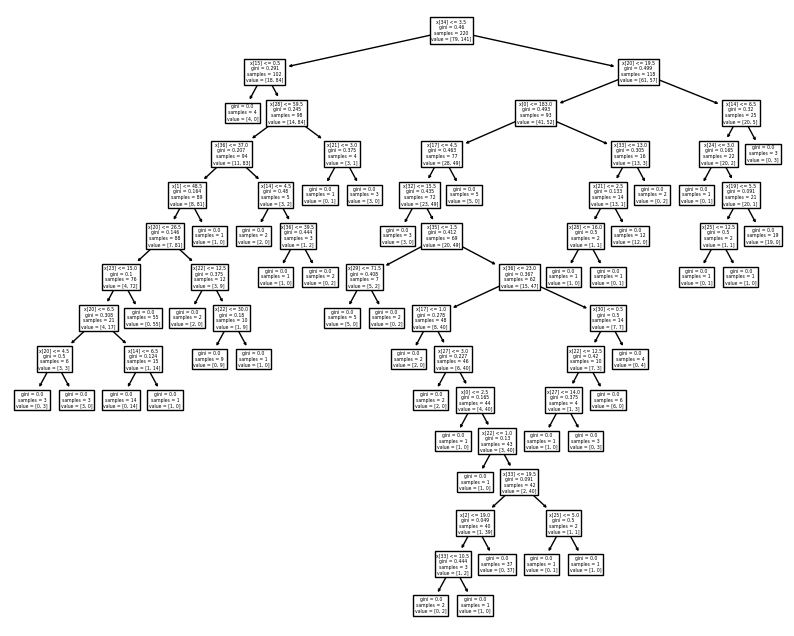

In [13]:
fig = plt.figure(figsize=(10,8))
tree.plot_tree(clf)

In [14]:
y_pred=clf.predict(x_test)

In [15]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.6071428571428571


In [16]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[ 9 12]
 [10 25]]


In [17]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.47      0.45        19
           1       0.71      0.68      0.69        37

    accuracy                           0.61        56
   macro avg       0.57      0.57      0.57        56
weighted avg       0.62      0.61      0.61        56



In [18]:
with open("bands.txt","w") as f:
    f=tree.export_graphviz(clf,out_file=f)

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

[Text(0.5074013157894737, 0.9583333333333334, 'x[34] <= 3.5\ngini = 0.446\nsamples = 143\nvalue = [74, 146]'),
 Text(0.2565789473684211, 0.875, 'x[32] <= 0.5\ngini = 0.235\nsamples = 65\nvalue = [14, 89]'),
 Text(0.23026315789473684, 0.7916666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.28289473684210525, 0.7916666666666666, 'x[27] <= 38.5\ngini = 0.222\nsamples = 64\nvalue = [13, 89]'),
 Text(0.2565789473684211, 0.7083333333333334, 'x[28] <= 55.0\ngini = 0.32\nsamples = 43\nvalue = [13, 52]'),
 Text(0.17105263157894737, 0.625, 'x[26] <= 62.5\ngini = 0.159\nsamples = 30\nvalue = [4, 42]'),
 Text(0.10526315789473684, 0.5416666666666666, 'x[2] <= 106.5\ngini = 0.097\nsamples = 24\nvalue = [2, 37]'),
 Text(0.05263157894736842, 0.4583333333333333, 'x[9] <= 1.0\ngini = 0.061\nsamples = 20\nvalue = [1, 31]'),
 Text(0.02631578947368421, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [0, 26]'),
 Text(0.07894736842105263, 0.375, 'x[28] <= 36.5\ngini = 0.278\nsamples = 3\nvalue = [1

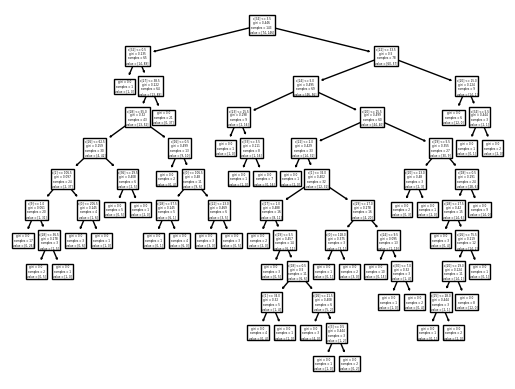

In [21]:
tree.plot_tree(rf.estimators_[0])

In [22]:
y_pred=rf.predict(x_test)

In [23]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.75


In [24]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[12  7]
 [ 7 30]]


In [25]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.81      0.81      0.81        37

    accuracy                           0.75        56
   macro avg       0.72      0.72      0.72        56
weighted avg       0.75      0.75      0.75        56



In [26]:
with open("bandsRF.txt","w") as f:
    f=tree.export_graphviz(rf.estimators_[0],out_file=f)